<a href="https://colab.research.google.com/github/Carlos1729/Colab-Notebooks/blob/main/autoencoder_code_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import tensorflow as tf
# tf.__version__

from sklearn.metrics import accuracy_score, precision_score, recall_score #different attributes to measure the performance of the model 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.model_selection import train_test_split #To split the given datasets into train test cases 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
from tensorflow.keras import layers,losses #keras is used to create the nn and layers and losses are some necessary attributes that are required
from tensorflow.keras.datasets import fashion_mnist #importing standard dataset 
from tensorflow.keras.models import Model #Model groups layers into an object with training and inference features.


#importing the necessary libraries

In [3]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score #different attributes to measure the performance of the model 
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# from sklearn.model_selection import train_test_split #To split the given datasets into train test cases 
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
# from tensorflow.keras import layers,losses #keras is used to create the nn and layers and losses are some necessary attributes that are required
# from tensorflow.keras.datasets import fashion_mnist #importing standard dataset 
# from tensorflow.keras.models import Model #Model groups layers into an object with training and inference features.

In [5]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()#train test split 

#normalizing the input 
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [6]:
latent_dim = 64# what is this

#https://stackoverflow.com/questions/22744102/pyqt4-why-do-we-need-to-pass-class-name-in-call-to-super
# https://www.geeksforgeeks.org/python-super/
# https://stackoverflow.com/questions/44176982/how-does-the-flatten-layer-work-in-keras
# https://stackoverflow.com/questions/60783216/what-exactly-does-tf-keras-layers-dense-do

class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation = 'relu'),#from 784 your are converting it into a latent space of 64 neurons # Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784,activation = 'sigmoid'),#now from that latent space you are tring to rebtain the original image by conversting it into one hot vector then to input image
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  
autoencoder = Autoencoder(latent_dim)


In [7]:
autoencoder.compile(optimizer='adam', loss = losses.MeanSquaredError())

In [8]:
# Train the model using x_train as both the input and the target. The encoder will learn to compress the dataset from 784 dimensions to the
# latent space, and the decoder will learn to reconstruct the original images. .
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

autoencoder.fit(x_train,x_train,epochs = 10,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0234 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [9]:
print(autoencoder.summary())

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                50240     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
original_imgs = autoencoder.encoder(x_test).numpy()
generated_imgs = autoencoder.decoder(original_imgs).numpy()

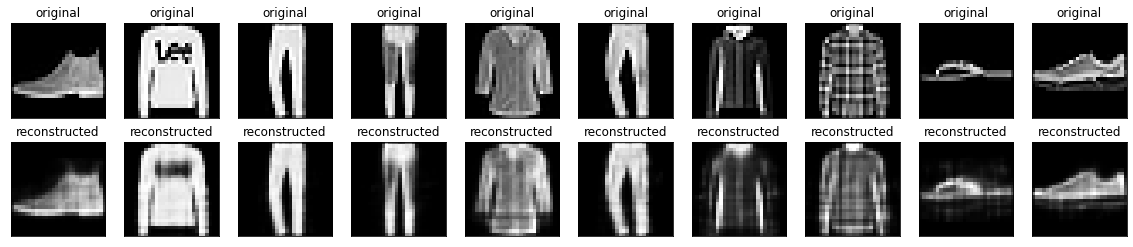

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(generated_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
#Normal Encoder is done 

In [13]:
# An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

# Let's reimport the dataset to omit the modifications made earlier.

In [14]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()#train test split 

In [15]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
x_train = x_train[..., tf.newaxis]#adding one more axis for this image or input 
# https://stackoverflow.com/questions/64312153/tf-newaxis-operation-in-tensorflow
x_test = x_test[..., tf.newaxis]


print(x_train.shape)

(60000, 28, 28, 1)


In [28]:
noise_factor = 0.2

# https://medium.com/image-vision/noise-in-digital-image-processing-55357c9fab71
#Outputs random values from a normal distribution.
# https://medium.com/@sunil7545/speckle-vs-gaussian-noise-7f4f47230d82
# https://www.tensorflow.org/api_docs/python/tf/clip_by_value

x_train_noisy = x_train + noise_factor * tf.random.normal(shape = x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape = x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

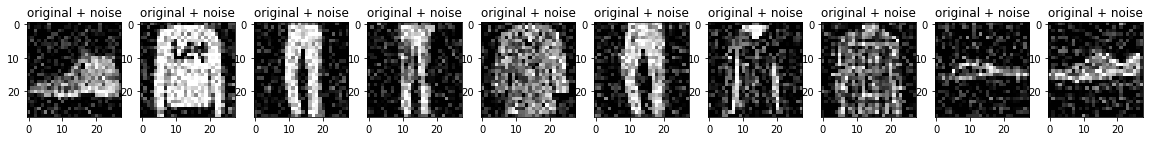

In [29]:
# https://www.tensorflow.org/api_docs/python/tf/squeeze removes that extra one that we have added previously 
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [30]:

#https://stackoverflow.com/questions/22744102/pyqt4-why-do-we-need-to-pass-class-name-in-call-to-super
# https://www.geeksforgeeks.org/python-super/
# https://stackoverflow.com/questions/44176982/how-does-the-flatten-layer-work-in-keras
# https://stackoverflow.com/questions/60783216/what-exactly-does-tf-keras-layers-dense-do

class DenoiseAutoencoder(Model):
  def __init__(self):
    super(DenoiseAutoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape  = (28,28,1)),
        layers.Conv2D(16, (3,3),activation='relu',padding='same',strides=2),#https://www.geeksforgeeks.org/keras-conv2d-class/
        layers.Conv2D(8, (3,3),activation='relu',padding='same',strides=2),#https://www.geeksforgeeks.org/keras-conv2d-class/
# in the first layer, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    ])
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size=3, activation='relu', padding='same', strides=2),#https://www.geeksforgeeks.org/keras-conv2d-class/
        layers.Conv2DTranspose(16, kernel_size=3,activation='relu',padding='same',strides=2),#https://www.geeksforgeeks.org/keras-conv2d-class/
        layers.Conv2D(1,kernel_size=3,activation = 'sigmoid',padding='same'),#now from that latent space you are tring to rebtain the original image by conversting it into one hot vector then to input image
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  
denoiseautoencoder = DenoiseAutoencoder()

In [31]:
denoiseautoencoder.compile(optimizer='adam', loss = losses.MeanSquaredError())

In [32]:
denoiseautoencoder.fit(x_train_noisy,x_train,epochs = 10,shuffle=True,validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0163 - val_loss: 0.0097
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/10
1875/1875 [==============================] - 61s 33m

In [33]:
denoiseautoencoder.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [34]:
denoiseautoencoder.decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [35]:
original_noised_imgs = denoiseautoencoder.encoder(x_test_noisy).numpy()
generated_imgs = denoiseautoencoder.decoder(original_noised_imgs).numpy()

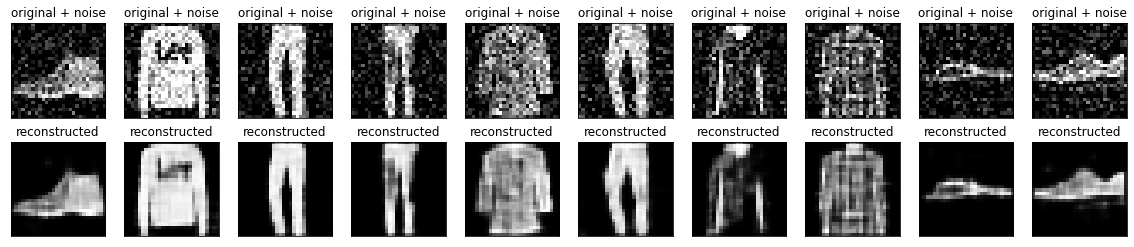

In [36]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(generated_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()